In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
#Displaying selected columns
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly" : "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [4]:
#Count of not null rows in Salary
df["Salary"].notnull().sum()

48019

In [5]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [6]:
df

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0
...,...,...,...,...,...
89162,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24,"Employed, full-time",50719.0
89166,Armenia,Some college/university study without earning ...,2,"Employed, full-time;Independent contractor, fr...",16917.0
89167,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",15752.0
89170,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,"Employed, full-time",64254.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [8]:
#Count of null items
df.isnull().sum()

Country           0
EdLevel           0
YearsCodePro    194
Employment       12
Salary            0
dtype: int64

In [9]:
# Removes NA rows
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [10]:
#Keeps the record of "Employment full-time" and drops Employment column
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39155 non-null  object 
 1   EdLevel       39155 non-null  object 
 2   YearsCodePro  39155 non-null  object 
 3   Salary        39155 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [11]:
#Count of each countries
a = df['Country'].value_counts()
a

United States of America                                10569
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: Country, Length: 165, dtype: int64

In [12]:
# def shorten_categories(categories, cutoff):
#     categorical_map = {}
#     for i in range(len(categories)):
#         if categories.values[i] >= cutoff:
#             categorical_map[categories.index[i]] = categories.index[i]
#         else:
#             categorical_map[categories.index[i]] = 'Other'
#     return categorical_map

In [13]:
a['United States of America']

10569

In [14]:
#Displays countries with cutoff=400
countries_to_replace = a[a <= 400].index
countries_to_replace

Index(['Portugal', 'Austria', 'Finland', 'Belgium', 'Russian Federation',
       'New Zealand', 'Ukraine', 'Turkey', 'Czech Republic', 'South Africa',
       ...
       'Liechtenstein', 'Dominica', 'Niger', 'Monaco', 'Mauritania',
       'Botswana', 'Sierra Leone', 'Guyana', 'Guinea-Bissau',
       'Antigua and Barbuda'],
      dtype='object', length=148)

In [15]:
df['Country'] = df['Country'].replace(countries_to_replace, 'Other')

In [16]:
a = df['Country'].value_counts()
a

United States of America                                10569
Other                                                    9282
Germany                                                  3201
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1458
Netherlands                                              1002
Australia                                                 985
Brazil                                                    972
Spain                                                     966
Sweden                                                    882
Italy                                                     826
Poland                                                    740
Switzerland                                               511
Denmark                                                   440
Norway  

In [17]:
a['Other']

9282

In [18]:
#Quick check whether Other is replaced properly 
a['United States of America']

10569

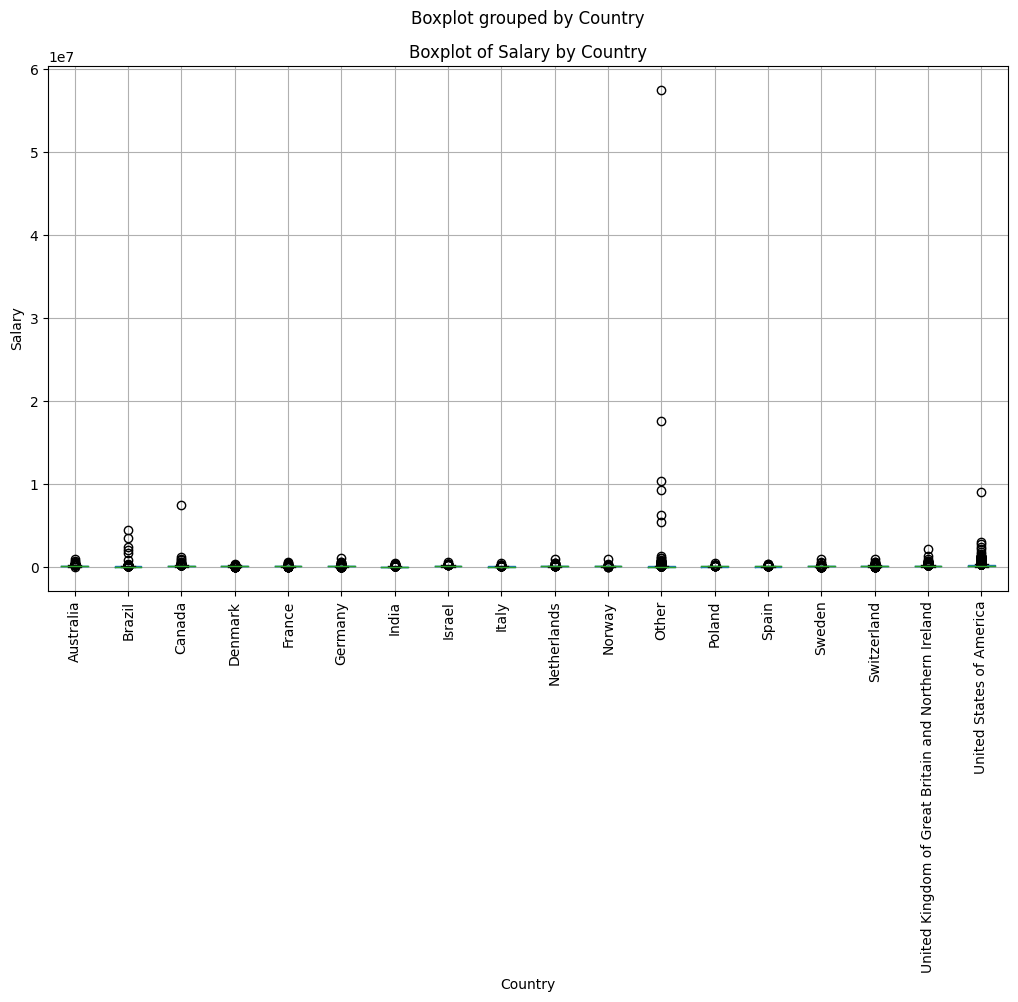

In [19]:
#Boxplot: Country vs Salary
fig, ax=plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary','Country', ax=ax)
plt.title('Boxplot of Salary by Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
#plt.tight_layout()
ax.yaxis.set_major_locator(MultipleLocator(10e6))
plt.show()

In [20]:
#Boxes are median values, dots are outliers which needs to be removed

In [21]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other']

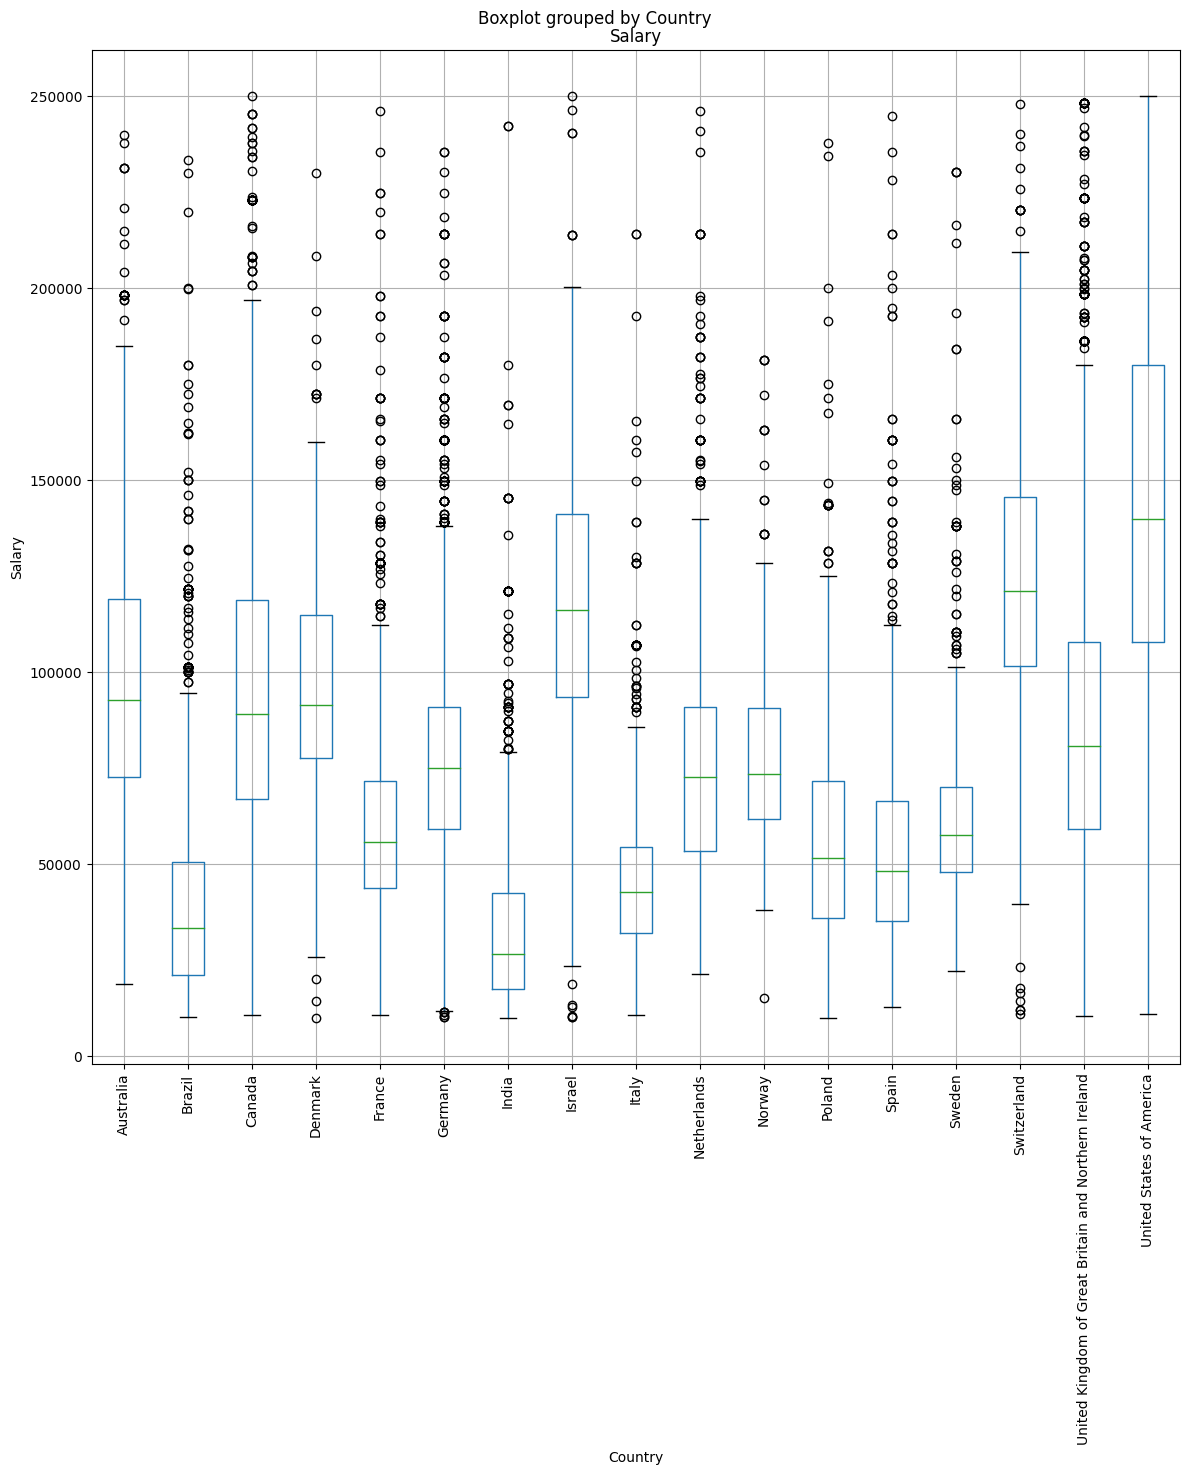

In [22]:
#Boxplot: Country vs Salary
fig, ax=plt.subplots(1,1, figsize=(12, 15))
df.boxplot('Salary','Country', ax=ax)
#plt.title('Boxplot of Salary by Country')
plt.xlabel('Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [23]:
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '9', 'Less than 1 year', '10', '2', '6',
       '14', '5', '15', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [24]:
#Making all the data types to float
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [25]:
df["YearsCodePro"].unique()

array([23. ,  7. , 21. ,  3. ,  9. ,  0.5, 10. ,  2. ,  6. , 14. ,  5. ,
       15. , 19. , 13. , 16. , 28. , 24. , 25. , 12. ,  4. , 20. ,  8. ,
       18. , 30. , 27. , 17. , 43. , 38. , 33. , 29. , 22. ,  1. , 11. ,
       34. , 42. , 26. , 31. , 36. , 39. , 40. , 32. , 44. , 37. , 35. ,
       48. , 50. , 45. , 41. , 46. , 49. , 47. ])

In [26]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [27]:
#Replacing all the values keeping only bachelors, masters, post grad, less than bachelors
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a Bachelors"
   

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [28]:
df['EdLevel'].unique()

array(["Bachelor's degree", 'Less than a Bachelors', "Master's degree",
       'Post grad'], dtype=object)

In [29]:
df['EdLevel']

2            Bachelor's degree
3            Bachelor's degree
5        Less than a Bachelors
6        Less than a Bachelors
7            Bachelor's degree
                 ...          
89156        Bachelor's degree
89158        Bachelor's degree
89162          Master's degree
89167        Bachelor's degree
89170          Master's degree
Name: EdLevel, Length: 27716, dtype: object

### We need to work with comparing salary and education, model cant identify string - so making education to number

In [30]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2, 3])

In [31]:
le_country = LabelEncoder()
df['Country'] = le_education.fit_transform(df['Country'])
df['Country'].unique()

array([16, 15,  0,  9,  5, 13,  4, 12,  1,  8,  2, 14,  6, 10,  3,  7, 11])

In [32]:
df

,Country,EdLevel,YearsCodePro,Salary
2,16,0,23.0,250000.0
3,16,0,7.0,156000.0
5,15,1,21.0,96828.0
6,16,1,3.0,135000.0
7,16,0,3.0,80000.0
...,...,...,...,...
89156,16,0,8.0,195000.0
89158,13,0,8.0,52981.0
89162,1,2,24.0,50719.0
89167,6,0,2.0,15752.0


In [33]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [34]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

In [35]:
y_pred = linear_reg.predict(X)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = np.sqrt(mean_squared_error(y,y_pred))

In [37]:
error

46082.71046497013

In [38]:
#Using Decision Tree 
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [39]:
y_pred = dec_tree_reg.predict(X)

In [40]:
#data = pd.DataFrame({
 #   'Country': [17],
  #  'EdLevel': [2],
   # 'YearsCodePro': [8]
#})

In [41]:
#data

In [42]:
#y_pred = linear_reg.predict(data)

In [43]:
#y_pred

In [44]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$33,748.85


In [45]:
#Using Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X,y)

RandomForestRegressor(random_state=0)

In [46]:
y_pred = random_forest_reg.predict(X)

In [47]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$33,818.22


In [48]:
#Using Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [49]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,647.64


In [50]:
X

,Country,EdLevel,YearsCodePro
2,16,0,23.0
3,16,0,7.0
5,15,1,21.0
6,16,1,3.0
7,16,0,3.0
...,...,...,...
89156,16,0,8.0
89158,13,0,8.0
89162,1,2,24.0
89167,6,0,2.0


In [51]:
data = pd.DataFrame({
    'Country': ['United States'],
   'EdLevel': ["Master's degree"],
  'YearsCodePro': [15]
})

In [52]:
data

,Country,EdLevel,YearsCodePro
0,United States,Master's degree,15


In [53]:
X = np.array([["United States", "Master's degree", 15]])
X

array([['United States', "Master's degree", '15']], dtype='<U15')